In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/content/SSL.csv'  # Path to the uploaded dataset
data = pd.read_csv(file_path)

In [3]:
# Check for missing values and handle them
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

No missing values detected.


In [4]:
# Separate features and labels
if 'LABEL' in data.columns:
    features = data.drop(columns=['LABEL'])  # Assuming the 'label' column represents the target variable
    labels = data['LABEL']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the file contains a 'label' column.")

Features and labels separated successfully.


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features standardized successfully.")

Features standardized successfully.


In [7]:
# Perform LDA with all 16 components
lda = LDA(n_components=16)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)
print("LDA transformation completed.")

LDA transformation completed.


In [8]:
# Explained variance ratio for each component
explained_variance_ratio = lda.explained_variance_ratio_
print("Explained Variance Ratio for each component:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {variance:.4f} ({variance * 100:.2f}%)")

Explained Variance Ratio for each component:
Component 1: 0.4233 (42.33%)
Component 2: 0.3124 (31.24%)
Component 3: 0.1234 (12.34%)
Component 4: 0.0622 (6.22%)
Component 5: 0.0352 (3.52%)
Component 6: 0.0134 (1.34%)
Component 7: 0.0111 (1.11%)
Component 8: 0.0088 (0.88%)
Component 9: 0.0056 (0.56%)
Component 10: 0.0021 (0.21%)
Component 11: 0.0013 (0.13%)
Component 12: 0.0006 (0.06%)
Component 13: 0.0003 (0.03%)
Component 14: 0.0002 (0.02%)
Component 15: 0.0001 (0.01%)
Component 16: 0.0000 (0.00%)


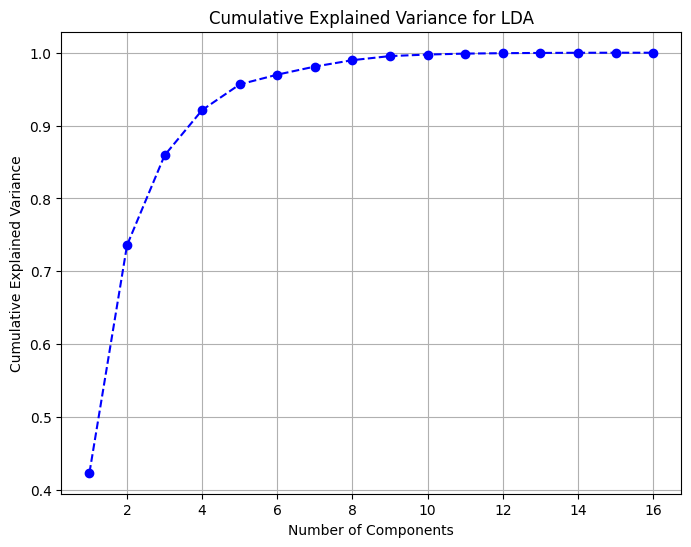

In [9]:
# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance for LDA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [10]:
# Save LDA-transformed data for inspection (optional)
lda_df = pd.DataFrame(data=X_train_lda, columns=[f'LDA{i + 1}' for i in range(X_train_lda.shape[1])])
lda_df['label'] = y_train.values
lda_df.to_csv('LDA_results.csv', index=False)
print("LDA results saved to 'LDA_results.csv'.")

LDA results saved to 'LDA_results.csv'.
